In [1]:
# Import the pandas library to work with data tables (DataFrames)
import pandas as pd

# Import the DecisionTreeRegressor and a function to visualize the tree
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Import matplotlib to help us plot the tree
import matplotlib.pyplot as plt

In [2]:
# Load the data
climb = pd.read_csv("https://raw.githubusercontent.com/schuckers/Charlotte_SCORE_Summer25/refs/heads/main/Data%20for%20Modules/Data%20for%20intro%20to%20regression%20tree/climber_df.csv", na_values=['?'])
climb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10927 entries, 0 to 10926
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       10927 non-null  int64  
 1   country       10927 non-null  object 
 2   sex           10927 non-null  int64  
 3   height        10927 non-null  int64  
 4   weight        10927 non-null  int64  
 5   age           10927 non-null  float64
 6   years_cl      10927 non-null  int64  
 7   date_first    10927 non-null  object 
 8   date_last     10927 non-null  object 
 9   grades_count  10927 non-null  int64  
 10  grades_first  10927 non-null  int64  
 11  grades_last   10927 non-null  int64  
 12  grades_max    10927 non-null  int64  
 13  grades_mean   10927 non-null  float64
 14  year_first    10927 non-null  int64  
 15  year_last     10927 non-null  int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 1.3+ MB


1. Predict `grades_max` by creating a regression tree with `weight` and `height` as predictors.

In [ ]:
# Keep only the target and 2 predictors, drop missing data
df = climb[['grades_max', 'weight', 'height']].dropna()

In [ ]:
# Define X (input features) and y (target)
X = df[['weight', 'height']]
y = df['grades_max']

In [ ]:
# Train a small regression tree
reg_tree = DecisionTreeRegressor(max_depth=2, random_state=42)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

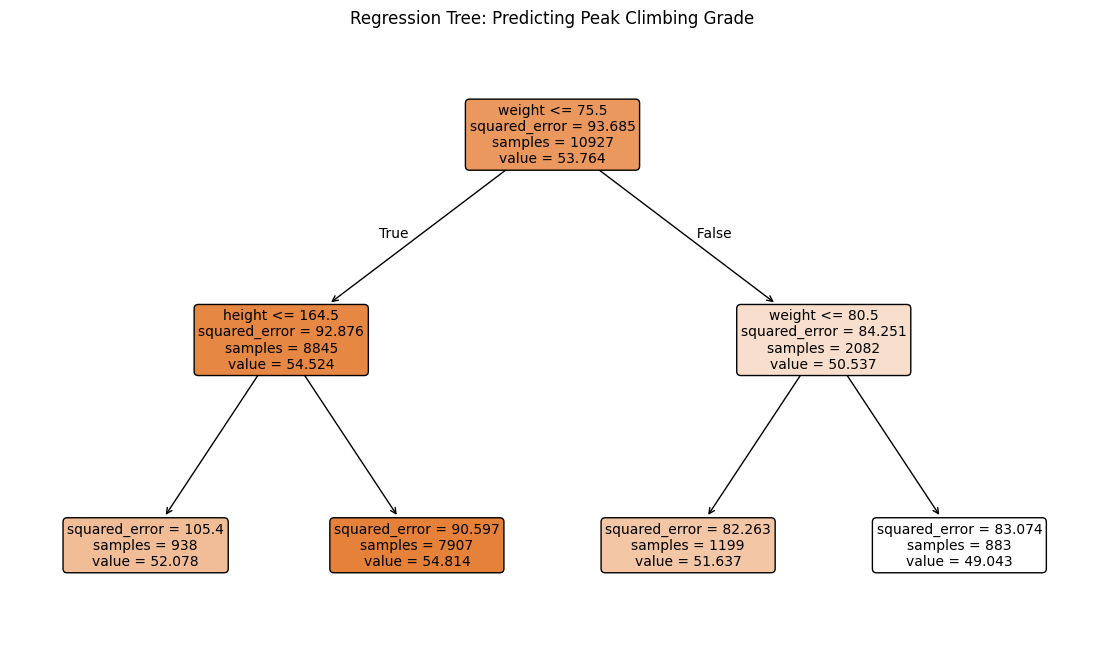

In [ ]:
# Visualize the tree
plt.figure(figsize=(14, 8))
plot_tree(reg_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Regression Tree: Predicting Peak Climbing Grade")
plt.show()

2. Interpret the results. 

The first split is on weight ≤ 75.5. This means the tree first checks if the climber weighs 75.5 kg or less.

- If a climber has `weight ≤ 75.5` → go left
    - Then check if `height ≤ 164.5`
        - If the climber is shorter than or equal to 164.5 cm, their average peak grade is 52.1.
        - If the climber is taller than 164.5 cm, they perform slightly better with an average peak grade of 54.8.

- If a climber has `weight > 75.5` → go right
    - Then check if `weight ≤ 80.5`
        - Climbers with weight between 75.5 and 80.5 kg have an average peak grade of 51.6.
        - Climbers with weight more than 80.5 kg have a lower average peak grade of 49.0.

**Summary** 
- Lower weight climbers tend to perform better overall.
- Among lighter climbers, taller climbers do slightly better.
- Heavier climbers show a gradual decrease in peak climbing grade as weight increases.

3. Add another predictor of your choice, change the `max_depth` from 2 to 4. How does the structure of the tree change?

In [8]:
# Keep only the target and 2 predictors, drop missing data
df = climb[['grades_max', 'weight', 'height', 'age']].dropna()

# Define X (input features) and y (target)
X = df[['weight', 'height', 'age']]
y = df['grades_max']

In [9]:
# Train a small regression tree
reg_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
reg_tree.fit(X, y)

DecisionTreeRegressor(max_depth=4, random_state=42)

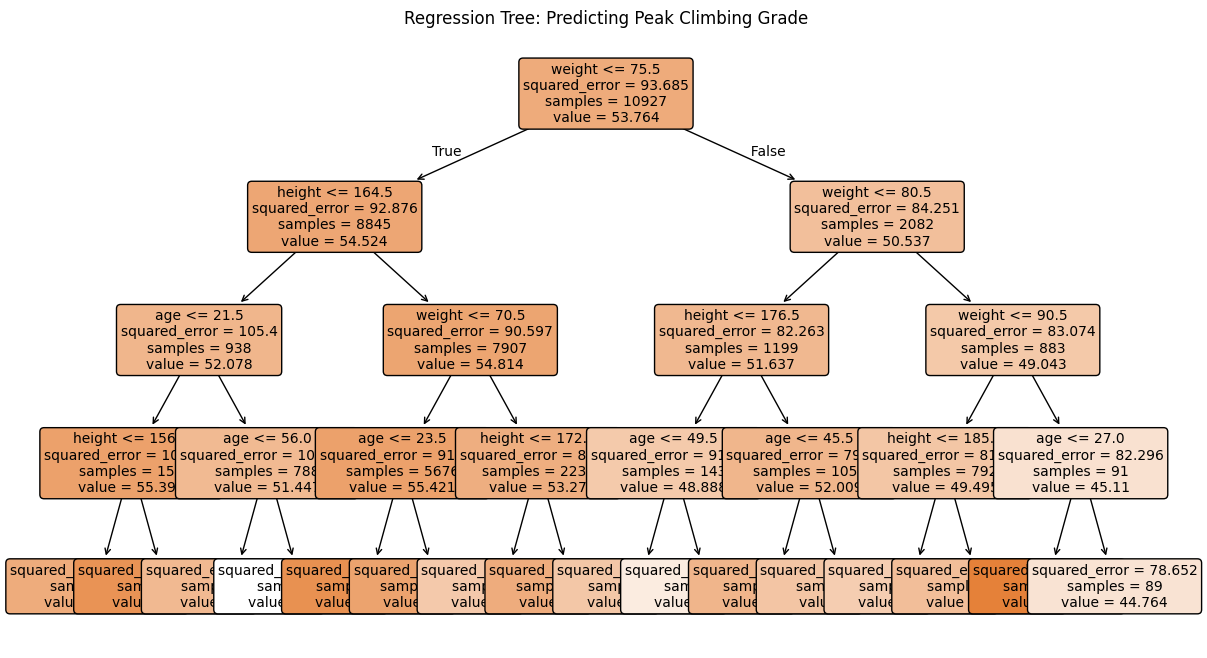

In [10]:
# Visualize the tree
plt.figure(figsize=(14, 8))
plot_tree(reg_tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Regression Tree: Predicting Peak Climbing Grade")
plt.show()

The structure now includes additional splits based on age and height deeper in the branches. With `max_depth=4`, the tree has more levels, allowing it to make finer distinctions between groups of climbers.